In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance

In [2]:
import numpy as np
import networkx as nx

In [3]:
file = open("summarize_text.txt", "r")
filedata = file.readlines()

In [4]:
text = filedata[0].split(". ")

In [5]:
nltk.download("stopwords")
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Atharva
[nltk_data]     Nangare\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [6]:
sentences = []
for sentence in text:
  sentences.append(sentence.replace("[^a-zA-Z]", " ").split(" "))
sentences.pop()

['20th', 'Air', 'Force', 'during', 'World', 'War', 'II.']

In [7]:
similarity_matrix = np.zeros((len(sentences), len(sentences)))
for i in range (len(sentences)):
  for j in range (len(sentences)):
    if i != j:
      sent1 = [w.lower() for w in sentences[i]]
      sent2 = [w.lower() for w in sentences[j]]

      all_words = list(set(sent1 + sent2))

      v1 = [0] * len(all_words)
      v2 = [0] * len(all_words)

      for w in sent1:
        if w not in stop_words:
          v1[all_words.index(w)] += 1

      for w in sent2:
        if w not in stop_words:
          v2[all_words.index(w)] += 1
      
      similarity_matrix[i][j] = 1 - cosine_distance(v1, v2)

In [8]:
sentence_similarity_graph = nx.from_numpy_array(similarity_matrix)
scores = nx.pagerank(sentence_similarity_graph)

In [9]:
ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)

In [10]:
summarize_text = []
for i in range(int(len(sentences)/2)):
  summarize_text.append(" ".join(ranked_sentence[i][1]))

In [11]:
print("Summarize Text: \n", ". ".join(summarize_text))

Summarize Text: 
 The first Indian Institute of Technology was thus established in May 1950 as the Eastern Higher Technical Institute. IIT Kharagpur is the 4th oldest technical institute in the West Bengal state after Indian Institute of Engineering Science and Technology Shibpur (established as B.E. Indian Institute of Technology Kharagpur (IIT Kharagpur) is a public technical university established by the government of India in Kharagpur, West Bengal, India. Established in 1951, the institute is the first of the IITs to be established and is recognized as an Institute of National Importance. In its interim report, the Sarkar Committee recommended the establishment of higher technical institutions in India, along the lines of the Massachusetts Institute of Technology and consulting from the University of Illinois at Urbanaâ€“Champaign along with affiliated secondary institutions. The institute was initially established to train engineers after India attained independence in 1947. Coll

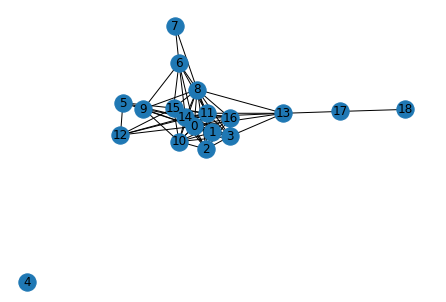

In [12]:
nx.draw_spring(sentence_similarity_graph, with_labels = True)

In [13]:
print(similarity_matrix)

[[0.         0.25197632 0.35634832 0.31426968 0.         0.08908708
  0.05025189 0.         0.18144368 0.06085806 0.19641855 0.37796447
  0.05555556 0.06804138 0.37851665 0.22680461 0.06804138 0.
  0.        ]
 [0.25197632 0.         0.20203051 0.35634832 0.         0.
  0.         0.         0.1028689  0.         0.17817416 0.5
  0.         0.         0.24525574 0.1028689  0.3086067  0.
  0.        ]
 [0.35634832 0.20203051 0.         0.25197632 0.         0.
  0.         0.         0.0727393  0.         0.06299408 0.20203051
  0.         0.         0.17342199 0.0727393  0.10910895 0.
  0.        ]
 [0.31426968 0.35634832 0.25197632 0.         0.         0.
  0.         0.         0.06415003 0.         0.05555556 0.26726124
  0.         0.09622504 0.15294382 0.06415003 0.09622504 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.       

In [14]:
print(scores)

{0: 0.09977260246287674, 1: 0.08083125113283267, 2: 0.05641812184838618, 3: 0.06490607180499222, 4: 0.008264462809917356, 5: 0.028040617580887814, 6: 0.03518764865888735, 7: 0.01996792443499175, 8: 0.07124836676142166, 9: 0.024281894175250302, 10: 0.0528355495870584, 11: 0.10637311066937603, 12: 0.023498862434144258, 13: 0.049625492997165135, 14: 0.10366757480523792, 15: 0.06135513630244557, 16: 0.04656135333571855, 17: 0.04783203929074689, 18: 0.019331918907662754}


In [15]:
print(ranked_sentence)

[(0.10637311066937603, ['The', 'first', 'Indian', 'Institute', 'of', 'Technology', 'was', 'thus', 'established', 'in', 'May', '1950', 'as', 'the', 'Eastern', 'Higher', 'Technical', 'Institute']), (0.10366757480523792, ['IIT', 'Kharagpur', 'is', 'the', '4th', 'oldest', 'technical', 'institute', 'in', 'the', 'West', 'Bengal', 'state', 'after', 'Indian', 'Institute', 'of', 'Engineering', 'Science', 'and', 'Technology', 'Shibpur', '(established', 'as', 'B.E']), (0.09977260246287674, ['Indian', 'Institute', 'of', 'Technology', 'Kharagpur', '(IIT', 'Kharagpur)', 'is', 'a', 'public', 'technical', 'university', 'established', 'by', 'the', 'government', 'of', 'India', 'in', 'Kharagpur,', 'West', 'Bengal,', 'India']), (0.08083125113283267, ['Established', 'in', '1951,', 'the', 'institute', 'is', 'the', 'first', 'of', 'the', 'IITs', 'to', 'be', 'established', 'and', 'is', 'recognized', 'as', 'an', 'Institute', 'of', 'National', 'Importance']), (0.07124836676142166, ['In', 'its', 'interim', 'repor